In [1]:
%pip install datasets -q


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
from datasets import load_dataset

In [2]:
dataset = load_dataset("haoranxu/ALMA-R-Preference", "ru-en")

In [1]:
dataset

NameError: name 'dataset' is not defined

In [ ]:
dataset['train']['translation'][0]

In [ ]:
len(dataset['train']['translation'])

In [ ]:
# for i in range(len(dataset['train']['translation'])):
#     if i % 100 == 0:
#         print(i)
#     current_sample = dataset['train']['translation'][i]
#     dataset_new['train']['translation'][i] = {'en': current_sample['en'], # reference ideal translation
#                                           'alma_en': current_sample['alma_en'],
#                                           'gpt4_en': current_sample['gpt4_en'],
#                                           'alma_en_xcomet': current_sample['alma_en_xcomet'],
#                                           'gpt4_en_xcomet': current_sample['gpt4_en_xcomet'],
#                                           'alma_en_kiwi': current_sample['alma_en_kiwi'],
#                                           'gpt4_en_kiwi': current_sample['gpt4_en_kiwi'],
#                                           'ru': current_sample['ru']} # text that need to be translated to en

In [11]:
import pandas as pd

xcomet_dataset = pd.DataFrame()
src, winner, loser = [], [], []

for i in range(len(dataset['train']['translation'])):
    if i % 100 == 0:
        print(i)
    current_sample = dataset['train']['translation'][i]
    src += [current_sample['ru']]
    if current_sample['alma_en_xcomet'] > current_sample['gpt4_en_xcomet']:
        winner += [current_sample['alma_en']]
        loser += [current_sample['gpt4_en']]
    else:
        winner += [current_sample['gpt4_en']]
        loser += [current_sample['alma_en']]
        
xcomet_dataset['src'] = src
xcomet_dataset['winner'] = winner
xcomet_dataset['loser'] = loser 
xcomet_dataset

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


,src,winner,loser
0,В понедельник ученые из Медицинской школы Стэн...,"On Monday, researchers at Stanford University'...","On Monday, scientists from Stanford University..."
1,"Ведущие исследователи утверждают, что он может...",Leading researchers claim that it can help in ...,Leading researchers say it could help detect c...
2,Приблизительно в 9:30 по местному времени (02:...,At around 9:30 local time (02:30 UTC) a JAS 39...,"At approximately 9:30 local time (02:30 UTC), ..."
3,Личность пилота была установлена. Им оказался ...,The pilot's identity has been established. It ...,The identity of the pilot was established. It ...
4,"Местные СМИ сообщают, что в аэропорту по пути ...",Local media report that a fire truck flipped o...,Local media reported that a fire truck overtur...
...,...,...,...
2004,"Так как эти районы являются малонаселенными, и...","Since these areas are sparsely populated, and,...","As these areas are sparsely populated, light p..."
2005,Японская культура труда иерархичнее и формальн...,Japanese work culture is more hierarchical and...,Japanese work culture is more hierarchical and...
2006,"Костюмы являются стандартной деловой одеждой, ...","Suits are standard business wear, and colleagu...","Suits are the standard business attire, and co..."
2007,"Чрезвычайно важна гармония на рабочем месте, а...","Workplace harmony is extremely important, and ...","Harmony at work is extremely important, and gr..."


In [12]:
xcomet_dataset.to_csv('data/xcomet_dataset.csv', index = False)

In [13]:
kiwi_dataset = pd.DataFrame()
src, winner, loser = [], [], []

for i in range(len(dataset['train']['translation'])):
    if i % 100 == 0:
        print(i)
    current_sample = dataset['train']['translation'][i]
    src += [current_sample['ru']]
    if current_sample['alma_en_kiwi'] > current_sample['gpt4_en_kiwi']:
        winner += [current_sample['alma_en']]
        loser += [current_sample['gpt4_en']]
    else:
        winner += [current_sample['gpt4_en']]
        loser += [current_sample['alma_en']]
        
kiwi_dataset['src'] = src
kiwi_dataset['winner'] = winner
kiwi_dataset['loser'] = loser 
kiwi_dataset

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


,src,winner,loser
0,В понедельник ученые из Медицинской школы Стэн...,"On Monday, scientists from Stanford University...","On Monday, researchers at Stanford University'..."
1,"Ведущие исследователи утверждают, что он может...",Leading researchers claim that it can help in ...,Leading researchers say it could help detect c...
2,Приблизительно в 9:30 по местному времени (02:...,"At approximately 9:30 local time (02:30 UTC), ...",At around 9:30 local time (02:30 UTC) a JAS 39...
3,Личность пилота была установлена. Им оказался ...,The identity of the pilot was established. It ...,The pilot's identity has been established. It ...
4,"Местные СМИ сообщают, что в аэропорту по пути ...",Local media report that a fire truck flipped o...,Local media reported that a fire truck overtur...
...,...,...,...
2004,"Так как эти районы являются малонаселенными, и...","As these areas are sparsely populated, light p...","Since these areas are sparsely populated, and,..."
2005,Японская культура труда иерархичнее и формальн...,Japanese work culture is more hierarchical and...,Japanese work culture is more hierarchical and...
2006,"Костюмы являются стандартной деловой одеждой, ...","Suits are standard business wear, and colleagu...","Suits are the standard business attire, and co..."
2007,"Чрезвычайно важна гармония на рабочем месте, а...","Workplace harmony is extremely important, and ...","Harmony at work is extremely important, and gr..."


In [14]:
kiwi_dataset.to_csv('data/kiwi_dataset.csv', index = False)

In [3]:
# FLUENCY
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cointegrated/roberta-large-cola-krishna2020")
model = AutoModelForSequenceClassification.from_pretrained("cointegrated/roberta-large-cola-krishna2020")
model = model.to(device)

/home/jupyter/.local/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [13]:
text = 'I forgot to feed my cat'

output = tokenizer(text, return_tensors="pt").to(device)
output

{'input_ids': tensor([[    0,   100, 18774,     7,  3993,   127,  4758,     2]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [14]:
res = model(**output)
res

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.4507, -2.9105]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [17]:
torch.softmax(res.logits, dim=-1)

tensor([[0.9953, 0.0047]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [19]:
torch.softmax(res.logits, dim=-1)[0][0]

tensor(0.9953, device='cuda:0', grad_fn=<SelectBackward0>)

In [28]:
import pandas as pd

fluency_dataset = pd.DataFrame()
src, winner, loser = [], [], []

for i in range(len(dataset['train']['translation'])):
    if i % 10 == 0:
        print(i)
    current_sample = dataset['train']['translation'][i]
    src += [current_sample['ru']]
    
    fluency_alma = tokenizer(current_sample['alma_en'], return_tensors="pt").to(device)
    fluency_alma = torch.softmax(model(**fluency_alma).logits, dim=-1)[0][0]
    
    fluency_gpt4 = tokenizer(current_sample['gpt4_en'], return_tensors="pt").to(device)
    fluency_gpt4 = torch.softmax(model(**fluency_gpt4).logits, dim=-1)[0][0]
    
    if fluency_alma > fluency_gpt4:
        winner += [current_sample['alma_en']]
        loser += [current_sample['gpt4_en']]
    else:
        winner += [current_sample['gpt4_en']]
        loser += [current_sample['alma_en']]
        
fluency_dataset['src'] = src
fluency_dataset['winner'] = winner
fluency_dataset['loser'] = loser 
fluency_dataset

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000


,src,winner,loser
0,В понедельник ученые из Медицинской школы Стэн...,"On Monday, researchers at Stanford University'...","On Monday, scientists from Stanford University..."
1,"Ведущие исследователи утверждают, что он может...",Leading researchers say it could help detect c...,Leading researchers claim that it can help in ...
2,Приблизительно в 9:30 по местному времени (02:...,At around 9:30 local time (02:30 UTC) a JAS 39...,"At approximately 9:30 local time (02:30 UTC), ..."
3,Личность пилота была установлена. Им оказался ...,The identity of the pilot was established. It ...,The pilot's identity has been established. It ...
4,"Местные СМИ сообщают, что в аэропорту по пути ...",Local media report that a fire truck flipped o...,Local media reported that a fire truck overtur...
...,...,...,...
2004,"Так как эти районы являются малонаселенными, и...","Since these areas are sparsely populated, and,...","As these areas are sparsely populated, light p..."
2005,Японская культура труда иерархичнее и формальн...,Japanese work culture is more hierarchical and...,Japanese work culture is more hierarchical and...
2006,"Костюмы являются стандартной деловой одеждой, ...","Suits are standard business wear, and colleagu...","Suits are the standard business attire, and co..."
2007,"Чрезвычайно важна гармония на рабочем месте, а...","Workplace harmony is extremely important, and ...","Harmony at work is extremely important, and gr..."


In [29]:
fluency_dataset.to_csv('data/fluency_dataset.csv', index = False)

In [31]:
cpo_dataset = pd.DataFrame()
src, winner, loser = [], [], []

for i in range(len(dataset['train']['translation'])):
    if i % 50 == 0:
        print(i)
        
    current_sample = dataset['train']['translation'][i]
    src += [current_sample['ru']]
    
    fluency_alma = tokenizer(current_sample['alma_en'], return_tensors="pt").to(device)
    fluency_alma = torch.softmax(model(**fluency_alma).logits, dim=-1)[0][0]
    
    fluency_gpt4 = tokenizer(current_sample['gpt4_en'], return_tensors="pt").to(device)
    fluency_gpt4 = torch.softmax(model(**fluency_gpt4).logits, dim=-1)[0][0]
    
    fluency_alma = (fluency_alma + current_sample['alma_en_kiwi'] + current_sample['alma_en_xcomet']) / 3
    fluency_gpt4 = (fluency_gpt4 + current_sample['gpt4_en_kiwi'] + current_sample['gpt4_en_xcomet']) / 3
    
    if fluency_alma > fluency_gpt4:
        winner += [current_sample['alma_en']]
        loser += [current_sample['gpt4_en']]
    else:
        winner += [current_sample['gpt4_en']]
        loser += [current_sample['alma_en']]
        
        
cpo_dataset['src'] = src
cpo_dataset['winner'] = winner
cpo_dataset['loser'] = loser 
cpo_dataset

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000


,src,winner,loser
0,В понедельник ученые из Медицинской школы Стэн...,"On Monday, researchers at Stanford University'...","On Monday, scientists from Stanford University..."
1,"Ведущие исследователи утверждают, что он может...",Leading researchers claim that it can help in ...,Leading researchers say it could help detect c...
2,Приблизительно в 9:30 по местному времени (02:...,At around 9:30 local time (02:30 UTC) a JAS 39...,"At approximately 9:30 local time (02:30 UTC), ..."
3,Личность пилота была установлена. Им оказался ...,The identity of the pilot was established. It ...,The pilot's identity has been established. It ...
4,"Местные СМИ сообщают, что в аэропорту по пути ...",Local media report that a fire truck flipped o...,Local media reported that a fire truck overtur...
...,...,...,...
2004,"Так как эти районы являются малонаселенными, и...","Since these areas are sparsely populated, and,...","As these areas are sparsely populated, light p..."
2005,Японская культура труда иерархичнее и формальн...,Japanese work culture is more hierarchical and...,Japanese work culture is more hierarchical and...
2006,"Костюмы являются стандартной деловой одеждой, ...","Suits are standard business wear, and colleagu...","Suits are the standard business attire, and co..."
2007,"Чрезвычайно важна гармония на рабочем месте, а...","Workplace harmony is extremely important, and ...","Harmony at work is extremely important, and gr..."


In [32]:
cpo_dataset.to_csv('data/cpo_dataset.csv', index = False)

In [33]:
%pip install huggingface_hub -q

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [34]:
from datasets import Dataset

dataset_cpo = Dataset.from_pandas(cpo_dataset)

In [35]:
dataset_cpo

Dataset({
    features: ['src', 'winner', 'loser'],
    num_rows: 2009
})

In [19]:
from pandas import DataFrame

dataset = load_dataset("marulyanova/ALMA-R-Preference-F")
df = DataFrame(dataset['train']['translation'])
df

,Delta,alma_en,alma_en_kiwi,alma_en_kiwi_xcomet,alma_en_xcomet,alma_ru,alma_ru_kiwi,alma_ru_kiwi_xcomet,alma_ru_xcomet,en,gpt4_en,gpt4_en_kiwi,gpt4_en_kiwi_xcomet,gpt4_en_xcomet,gpt4_ru,gpt4_ru_kiwi,gpt4_ru_kiwi_xcomet,gpt4_ru_xcomet,language_pair,ref_en_kiwi,ref_en_kiwi_xcomet,ref_en_xcomet,ref_ru_kiwi,ref_ru_kiwi_xcomet,ref_ru_xcomet,required_directions,ru
0,0.0,"On Monday, researchers at Stanford University'...",0.842576,0.891410,0.940243,В понедельник ученые из Школы медицины Стэнфор...,0.947797,0.947331,0.946866,"On Monday, scientists from the Stanford Univer...","On Monday, scientists from Stanford University...",0.863464,0.843561,0.823657,В понедельник учёные из Медицинской школы Стэн...,0.925481,0.934558,0.943635,ru-en,0.831671,0.810386,0.789101,0.941681,0.946758,0.951834,,В понедельник ученые из Медицинской школы Стэн...
1,0.0,Leading researchers say it could help detect c...,0.855090,0.843333,0.831575,"Основные исследователи говорят, что это может ...",0.924892,0.870960,0.817028,Lead researchers say this may bring early dete...,Leading researchers claim that it can help in ...,0.861727,0.928145,0.994562,"Ведущие исследователи говорят, что это может п...",0.976955,0.978656,0.980358,ru-en,0.824746,0.823999,0.823252,0.972896,0.974748,0.976600,,"Ведущие исследователи утверждают, что он может..."
2,0.0,"At approximately 9:30 local time (02:30 UTC), ...",0.879349,0.926376,0.973403,Самолет JAS 39C Gripen рухнул на взлетно-посад...,0.903978,0.935531,0.967085,The JAS 39C Gripen crashed onto a runway at ar...,At around 9:30 local time (02:30 UTC) a JAS 39...,0.866829,0.927372,0.987916,Истребитель JAS 39C Gripen разбился на взлетно...,0.952874,0.972747,0.992621,ru-en,0.859921,0.861010,0.862099,0.896390,0.932251,0.968112,,Приблизительно в 9:30 по местному времени (02:...
3,0.0,The pilot's identity has been established. It ...,0.756864,0.830107,0.903351,Пилот был идентифицирован как лейтенант Дилокр...,0.962037,0.953411,0.944785,The pilot was identified as Squadron Leader Di...,The identity of the pilot was established. It ...,0.815404,0.848394,0.881384,Летчика опознали как командира эскадрильи Дило...,0.958193,0.974810,0.991428,ru-en,0.803557,0.782292,0.761027,0.971815,0.983685,0.995555,,Личность пилота была установлена. Им оказался ...
4,0.0,Local media reported that a fire truck overtur...,0.826231,0.861575,0.896918,"Местные СМИ сообщают, что пожарная машина аэро...",0.960159,0.980079,1.000000,Local media reports an airport fire vehicle ro...,Local media report that a fire truck flipped o...,0.875460,0.937591,0.999721,"Местные СМИ сообщают, что пожарная машина в аэ...",0.955236,0.977618,1.000000,ru-en,0.755580,0.832858,0.910137,0.930592,0.965296,1.000000,,"Местные СМИ сообщают, что в аэропорту по пути ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,0.0,"As these areas are sparsely populated, light p...",0.890194,0.945097,1.000000,"Поскольку население здесь малочисленно, и свет...",0.925269,0.962635,1.000000,"As the areas are sparsely populated, and light...","Since these areas are sparsely populated, and,...",0.889205,0.944603,1.000000,"Поскольку районы слабо заселены и, следователь...",0.938765,0.969383,1.000000,ru-en,0.842071,0.904753,0.967435,0.951706,0.975853,1.000000,,"Так как эти районы являются малонаселенными, и..."
2005,0.0,Japanese work culture is more hierarchical and...,0.932158,0.966079,1.000000,Японская корпоративная культура более иерархич...,0.967160,0.983580,1.000000,Japanese work culture is more hierarchical and...,Japanese work culture is more hierarchical and...,0.933648,0.966824,1.000000,Японская рабочая культура более иерархична и ф...,0.452632,0.648631,0.844630,ru-en,0.887933,0.933526,0.979119,0.974342,0.987171,1.000000,,Японская культура труда иерархичнее и формальн...
2006,0.0,"Suits are standard business wear, and colleagu...",0.921347,0.960673,1.000000,"Костюмы являются стандартной деловой одеждой, ...",0.938116,0.969058,1.0000

In [10]:
dataset["train"]["translation"][0]

{'Delta': 0.0,
 'alma_en': "On Monday, researchers at Stanford University's School of Medicine announced the creation of a new diagnostic tool that can sort cells by type; it's a tiny chip that can be printed out using a standard inkjet printer for about a penny.",
 'alma_en_kiwi': 0.8425758481025696,
 'alma_en_kiwi_xcomet': 0.8914096057415009,
 'alma_en_xcomet': 0.9402433633804321,
 'alma_ru': 'В понедельник ученые из Школы медицины Стэнфордского университета объявили о создании нового диагностического инструмента, который может классифицировать клетки по типу: маленькая печатаемая микросхема, которую можно производить с помощью стандартных струйных принтеров по цене примерно в один цент каждая.',
 'alma_ru_kiwi': 0.9477968215942383,
 'alma_ru_kiwi_xcomet': 0.9473313689231873,
 'alma_ru_xcomet': 0.9468659162521362,
 'en': 'On Monday, scientists from the Stanford University School of Medicine announced the invention of a new diagnostic tool that can sort cells by type: a tiny printable

In [6]:
# DATASET ANALYSIS

import pandas as pd

df = pd.DataFrame()
gpt4_en_kiwi = []
gpt4_en_xcomet = []
alma_en_kiwi = []
alma_en_xcomet = []
gpt4_en_fluency = []
alma_en_fluency = []


for i in range(len(dataset['train']['translation'])):
    if i % 100 == 0:
        print(i)
        
    current_sample = dataset['train']['translation'][i]
    
    fluency_alma = tokenizer(current_sample['alma_en'], return_tensors="pt").to(device)
    fluency_alma = float(torch.softmax(model(**fluency_alma).logits, dim=-1)[0][0].detach().cpu())
    
    fluency_gpt4 = tokenizer(current_sample['gpt4_en'], return_tensors="pt").to(device)
    fluency_gpt4 = float(torch.softmax(model(**fluency_gpt4).logits, dim=-1)[0][0].detach().cpu())
    
    gpt4_en_kiwi += [current_sample['gpt4_en_kiwi']]
    gpt4_en_xcomet += [current_sample['gpt4_en_xcomet']]
    alma_en_kiwi += [current_sample['alma_en_kiwi']]
    alma_en_xcomet += [current_sample['alma_en_xcomet']]
    
    gpt4_en_fluency += [fluency_gpt4]
    alma_en_fluency += [fluency_alma]

df['gpt4_en_kiwi'] = gpt4_en_kiwi
df['gpt4_en_xcomet'] = gpt4_en_xcomet

df['alma_en_kiwi'] = alma_en_kiwi
df['alma_en_xcomet'] = alma_en_xcomet

df['gpt4_en_fluency'] = gpt4_en_fluency
df['alma_en_fluency'] = alma_en_fluency

0


NameError: name 'tokenizer' is not defined

0.0989317074529326
0.09775201254605416
not OK


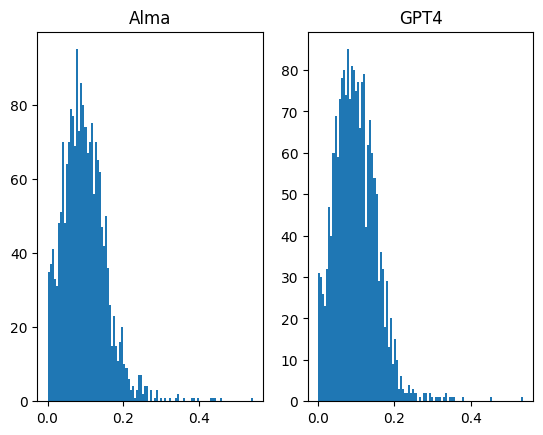

In [33]:
import matplotlib.pyplot as plt
import numpy as np

df['gpt4_difference'] = abs(df['gpt4_en_kiwi'] - df['gpt4_en_xcomet'])
df['alma_difference'] = abs(df['alma_en_kiwi'] - df['alma_en_xcomet'])
# df['fluency_difference'] = abs(df['gpt4_en_fluency'] - df['alma_en_fluency'])

mean_diff_kiwi = df['gpt4_difference'].mean()
mean_diff_xcomet = df['alma_difference'].mean()
# mean_diff_fluency = df['fluency_difference'].mean()

# Оценка: если разница незначительна (например, < 0.01), можно брать среднее
threshold = 0.01 

print(mean_diff_kiwi)
print(mean_diff_xcomet)
# print(mean_diff_fluency)

if mean_diff_kiwi < threshold and mean_diff_xcomet < threshold and mean_diff_fluency < threshold:
    print("OK")
else:
    print("not OK")
    
    
fig, (ax_a, ax_g) = plt.subplots(1, 2)
ax_a.hist(df["alma_difference"], bins=100)
ax_a.set_title("Alma")
ax_g.hist(df["gpt4_difference"], bins=100)
ax_g.set_title("GPT4")
fig.show()